In [1]:
# Preprocessing
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats

# To remove outliers
from scipy.stats import zscore

#importing nltk libraries
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import FreqDist

# Evaluation Metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve,accuracy_score,roc_auc_score,hamming_loss, log_loss

# Warning
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

Importing Scrapped Dataset:

In [2]:
#Reading csv file 
df = pd.read_csv("R_P.csv")
df

,Unnamed: 0,Review_Title,Review_Text,Ratings
0,0,Doesnt have IPS display nor the fingerprint sc...,"\n I received a 15"" laptop when I ordered thi...",2.0 out of 5 stars
1,1,Ok laptop if u r not using more than 5-6 hrs a...,\n &nbsp;This laptop is good only if u use a ...,2.0 out of 5 stars
2,2,No fingerprint reader,\n Fingerprint reader is a complete lie....no...,3.0 out of 5 stars
3,3,Built quality and software probleam.,\n I found some software probleam in this lap...,1.0 out of 5 stars
4,4,Sleekest Laptop at this price,\n Best laptop at this price. I have never se...,5.0 out of 5 stars
...,...,...,...,...
27236,27236,Good choice,Good monitor. Does the job,4
27237,27237,Great product,"Since a week , using the monitor for hardcore ...",5
27238,27238,Brilliant,I love it . Its amazing very good product,5
27239,27239,Brilliant,"Good product,\nThanks to flipkart for fast del...",5


dataset we have about 27241 rows and 4 columns

# Exploratory Data Analysis [EDA]:
Since Unnamed: 0 is the index column of csv file so let's drop that column as it will not help us in our predictions.

In [3]:
# Dropping unnecessary column
df.drop(columns = 'Unnamed: 0',inplace = True)

In [4]:
# Checking the shape of the dataset
print("There are {} Rows and {} Columns in the dataset".format(df.shape[0], df.shape[1]))

There are 27241 Rows and 3 Columns in the dataset


In [5]:
# Checking the column names in the dataset
print("Columns present in the dataset are:\n",df.columns)

Columns present in the dataset are:
 Index(['Review_Title', 'Review_Text', 'Ratings'], dtype='object')


In [6]:
# Let's check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27241 entries, 0 to 27240
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_Title  25779 non-null  object
 1   Review_Text   25705 non-null  object
 2   Ratings       25779 non-null  object
dtypes: object(3)
memory usage: 638.6+ KB


By observing the info we can say that there are some null values in the dataset and all the columns are of object data type which means all the entries are string entries.

In [7]:
# Checking for null values
print("Null values in the dataset: \n", df.isnull().sum())

Null values in the dataset: 
 Review_Title    1462
Review_Text     1536
Ratings         1462
dtype: int64


So we have a huge number of nan values in the dataset. Let's replace them using imputation methods

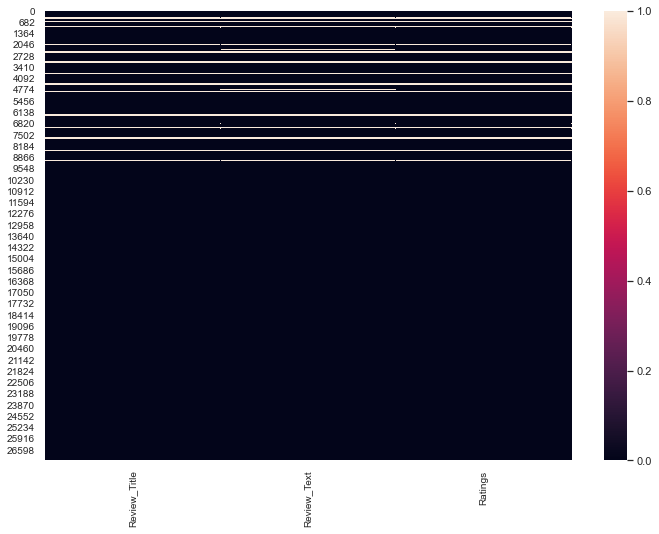

In [8]:
# Let's visualize the null values clearly in dataset using heat map
sns.set(rc={'figure.figsize':(11.8,8.27)})
sns.heatmap(data=df.isnull())
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()

# Replacing nan values using imputation method:

In [9]:
#Checking the mode of Review_Title column
df["Review_Title"].mode()

0    Wonderful
dtype: object

So the highest occuring Review_Title is Wonderful, we have to replace the nan values in Review_Title column with it's mode.

In [10]:
#Checking the mode of Review_Text column
df["Review_Text"].mode()

0    Good
dtype: object

So the highest occuring Review_Text is Good, we have to replace the nan values in Review_Text column with it's mode.

In [11]:
#Checking the value counts of Ratings column
df.Ratings.value_counts()

5                     11557
4                      3893
5.0 out of 5 stars     1877
1.0 out of 5 stars     1812
4.0 out of 5 stars     1554
2.0 out of 5 stars     1309
3.0 out of 5 stars     1299
1                      1039
3                      1038
2                       401
Name: Ratings, dtype: int64

Since the highes count in Ratings column is for 5 followed by 5.0 out of 5 starts and they both are same so it is clear the mode for Ratings column is 5.

In [12]:
#Checking the mode
df["Ratings"].mode()

0    5
dtype: object

In [13]:
#Replacing naa values with there mode as all the columns are categorical
df["Review_Title"] = df["Review_Title"].fillna(df["Review_Title"].mode()[0])
df["Review_Text"] = df["Review_Text"].fillna(df["Review_Text"].mode()[0])
df["Ratings"] = df["Ratings"].fillna(df["Ratings"].mode()[0])

In [14]:
# Checking for null values again
print("Null values in the dataset: \n", df.isnull().sum())

Null values in the dataset: 
 Review_Title    0
Review_Text     0
Ratings         0
dtype: int64


Now successfully we have replaced all the nan values using imputation method.

# Let's have a look into target column:

In [17]:
# Checking the unique value count of target column
df['Ratings'].unique()

array(['2.0 out of 5 stars', '3.0 out of 5 stars', '1.0 out of 5 stars',
       '5.0 out of 5 stars', '4.0 out of 5 stars', '5', '4', '3', '1',
       '2'], dtype=object)

looking the above entries in target column we came to know that we need to replace the string entries to there respective values(stars).

In [18]:
# Replacing the string entries in target column
df['Ratings'] = df['Ratings'].replace('1.0 out of 5 stars',1)
df['Ratings'] = df['Ratings'].replace('2.0 out of 5 stars',2)
df['Ratings'] = df['Ratings'].replace('3.0 out of 5 stars',3)
df['Ratings'] = df['Ratings'].replace('4.0 out of 5 stars',4)
df['Ratings'] = df['Ratings'].replace('5.0 out of 5 stars',5)
df['Ratings'] = df['Ratings'].astype('int')

In [19]:
# Checking the unique value count of target column again
df['Ratings'].unique()

array([2, 3, 1, 5, 4])

Now the target column looks good for our analysis.

# Now let's combine Review_Title and Review_Text to make a single column Review:

In [20]:
# Combining Review text and title
df['Review'] = df['Review_Title'].map(str)+' '+df['Review_Text']

In [21]:
#let's have a look into our dataset
df

,Review_Title,Review_Text,Ratings,Review
0,Doesnt have IPS display nor the fingerprint sc...,"\n I received a 15"" laptop when I ordered thi...",2,Doesnt have IPS display nor the fingerprint sc...
1,Ok laptop if u r not using more than 5-6 hrs a...,\n &nbsp;This laptop is good only if u use a ...,2,Ok laptop if u r not using more than 5-6 hrs a...
2,No fingerprint reader,\n Fingerprint reader is a complete lie....no...,3,No fingerprint reader \n Fingerprint reader i...
3,Built quality and software probleam.,\n I found some software probleam in this lap...,1,Built quality and software probleam. \n I fou...
4,Sleekest Laptop at this price,\n Best laptop at this price. I have never se...,5,Sleekest Laptop at this price \n Best laptop ...
...,...,...,...,...
27236,Good choice,Good monitor. Does the job,4,Good choice Good monitor. Does the job
27237,Great product,"Since a week , using the monitor for hardcore ...",5,"Great product Since a week , using the monitor..."
27238,Brilliant,I love it . Its amazing very good product,5,Brilliant I love it . Its amazing very good pr...
27239,Brilliant,"Good product,\nThanks to flipkart for fast del...",5,"Brilliant Good product,\nThanks to flipkart fo..."


Since we have obtained Review from Review_Title and Review_Text let's drop Review_Title and Review_Text. If not they'll create multicolinearity issue.

In [22]:
# Dropping unnecessary column
df.drop(columns = 'Review_Title',inplace = True)
df.drop(columns = 'Review_Text',inplace = True)

# Let's have a look into our Review column and see first 2 entries how the data looks:

In [23]:
# Checking data of first row in Review column
df['Review'][0]

'Doesnt have IPS display nor the fingerprint scanner or face Id worked! \n  I received a 15" laptop when I ordered this (same model) but that is not the problem, the problem is that the laptop doesn\'t have IPS display and the colors in the screen are also dissatisfactory. Neither the fingerprint scanner nor the face ID works in this, it says u do not have the driver but even after downloading the right drivers from the official website it is unable to install. I could not return the laptop as I had to use it urgently. Horrible experience.\n'

In [24]:
# Checking data of second row in Review column
df['Review'][1]

"Ok laptop if u r not using more than 5-6 hrs a day \n  &nbsp;This laptop is good only if u use a cooling pad  or else it get over heated when that happens it turns black and switchtches off so it's not good<br>Even for a student if ur attending classes more than 5-6 hrs it gets heated stuck and shuts down also it's not too fast initially it was very fast but then later became slow usable ram is 5.9 gb not 8gb also only 470gb storage if even the data Is just 30gb out of 470 it gets slow it is not for gaming<br>As soon as u update to windows 11 the laptop gets worse but at this rate it is ok and does its job there is a bit of anti glare not so effective screen brightness is not so good and charge holds good for 2 hrs max with internet<br>It's mic and sound is worst<br>For this rate u could go for someother laptops<br>But still it's managable<br>It boots fast ⏩ and the product is flimsy<br>and not sturdy the track pad is gone after 1 week even after using external mouse<br>Warranty is fo

# Text Processing:

In [25]:
#Here I am defining a function to replace some of the contracted words to their full form and removing urls and some unwanted text 
def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r'http\S+', '', text) #removing urls
    return text

In [26]:
# Changing all words to there Lowercase
df['Review'] = df['Review'].apply(lambda x : x.lower())

df['Review'] = df['Review'].apply(lambda x : decontracted(x))

# Removing punctuations
df['Review'] = df['Review'].str.replace('[^\w\s]','')
df['Review'] = df['Review'].str.replace('\n',' ')

# Let's have a look into our text again:

In [27]:
# Checking data of first row in Review column again
df['Review'][0]

'doesnt have ips display nor the fingerprint scanner or face id worked    i received a 15 laptop when i ordered this same model but that is not the problem the problem is that the laptop does not have ips display and the colors in the screen are also dissatisfactory neither the fingerprint scanner nor the face id works in this it says u do not have the driver but even after downloading the right drivers from the official website it is unable to install i could not return the laptop as i had to use it urgently horrible experience '

In [28]:
# Checking data of second row in Review column again
df['Review'][1]

'ok laptop if u r not using more than 56 hrs a day    nbspthis laptop is good only if u use a cooling pad  or else it get over heated when that happens it turns black and switchtches off so it is not good even for a student if ur attending classes more than 56 hrs it gets heated stuck and shuts down also it is not too fast initially it was very fast but then later became slow usable ram is 59 gb not 8gb also only 470gb storage if even the data is just 30gb out of 470 it gets slow it is not for gaming as soon as u update to windows 11 the laptop gets worse but at this rate it is ok and does its job there is a bit of anti glare not so effective screen brightness is not so good and charge holds good for 2 hrs max with internet it is mic and sound is worst for this rate u could go for someother laptops but still it is managable it boots fast  and the product is flimsy and not sturdy the track pad is gone after 1 week even after using external mouse warranty is for 1 year and antivirus is f

# Removing StopWords:

In [29]:
# Removing stopwords
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [30]:
# Checking the text data again
df['Review'][0]

'doesnt ips display fingerprint scanner face id worked received 15 laptop ordered model problem problem laptop ips display colors screen also dissatisfactory neither fingerprint scanner face id works says u driver even downloading right drivers official website unable install could return laptop use urgently horrible experience'

In [31]:
# Checking the text data again
df['Review'][1]

'ok laptop u r using 56 hrs day nbspthis laptop good u use cooling pad else get heated happens turns black switchtches good even student ur attending classes 56 hrs gets heated stuck shuts also fast initially fast later became slow usable ram 59 gb 8gb also 470gb storage even data 30gb 470 gets slow gaming soon u update windows 11 laptop gets worse rate ok job bit anti glare effective screen brightness good charge holds good 2 hrs max internet mic sound worst rate u could go someother laptops still managable boots fast product flimsy sturdy track pad gone 1 week even using external mouse warranty 1 year antivirus 1 month trial overall laptop best market cons things good laptop'

Now we have removed all stop words from the text data.

# Lemmatization:

In [32]:
#Initialising lemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()

In [33]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jaspreet rathod\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [34]:
#Defining functiom to convert nltk tag to wordnet tags
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [35]:
#defining function to lemmatize our text
def lemmatize_sentence(sentence):
    #tokenize the sentence & find the pos tag
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x : (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatize_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)

In [36]:
df['Review'] = df['Review'].apply(lambda x : lemmatize_sentence(x))

In [37]:
# Checking the text data again
df['Review'][0]

'doesnt ip display fingerprint scanner face id work receive 15 laptop order model problem problem laptop ip display color screen also dissatisfactory neither fingerprint scanner face id work say u driver even download right driver official website unable install could return laptop use urgently horrible experience'

In [38]:
# Checking the text data again
df['Review'][1]

'ok laptop u r use 56 hrs day nbspthis laptop good u use cool pad else get heat happens turn black switchtches good even student ur attend class 56 hrs get heat stuck shuts also fast initially fast late become slow usable ram 59 gb 8gb also 470gb storage even data 30gb 470 get slow gaming soon u update window 11 laptop get bad rate ok job bit anti glare effective screen brightness good charge hold good 2 hr max internet mic sound bad rate u could go someother laptop still managable boot fast product flimsy sturdy track pad go 1 week even use external mouse warranty 1 year antivirus 1 month trial overall laptop best market con thing good laptop'

So now we have removed the inflectional endings and left out with the base or dictionary form of a word.

# Text Normalization - Standardization:

In [39]:
#Noice removal
def scrub_words(text):
    #remove html markup
    text = re.sub("(<.*?>)", "", text)
    #remove non-ascii and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    #remove white space
    text = text.strip()
    return text

In [40]:
df['Review'] = df['Review'].apply(lambda x : scrub_words(x))

In [41]:
# Checking the text data again
df['Review'][0]

'doesnt ip display fingerprint scanner face id work receive  laptop order model problem problem laptop ip display color screen also dissatisfactory neither fingerprint scanner face id work say u driver even download right driver official website unable install could return laptop use urgently horrible experience'

In [42]:
# Checking the text data again
df['Review'][1]

'ok laptop u r use  hrs day nbspthis laptop good u use cool pad else get heat happens turn black switchtches good even student ur attend class  hrs get heat stuck shuts also fast initially fast late become slow usable ram  gb gb also gb storage even data gb  get slow gaming soon u update window  laptop get bad rate ok job bit anti glare effective screen brightness good charge hold good  hr max internet mic sound bad rate u could go someother laptop still managable boot fast product flimsy sturdy track pad go  week even use external mouse warranty  year antivirus  month trial overall laptop best market con thing good laptop'

# Visualization:

# i) Word Counts:

In [43]:
# Creating column for word counts in the text
df['Review_WordCount'] = df['Review'].apply(lambda x: len(str(x).split(' ')))
df[['Review_WordCount','Review']].head()

,Review_WordCount,Review
0,46,doesnt ip display fingerprint scanner face id ...
1,121,ok laptop u r use hrs day nbspthis laptop goo...
2,15,fingerprint reader fingerprint reader complete...
3,15,build quality software probleam find software ...
4,34,sleek laptop price best laptop price never see...


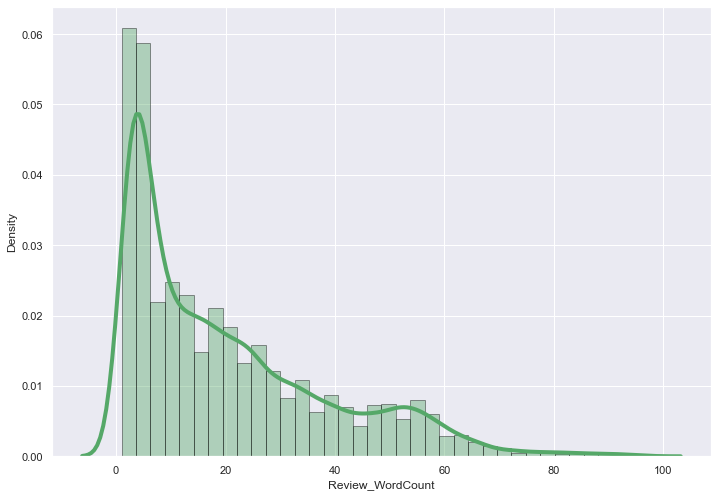

In [86]:
# density plot and histogram of Review word count
sns.distplot(df['Review_WordCount'], hist = True, kde = True,
            bins = int(180/5), color = 'g',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

By observing the histogram we can clearly see that most of our text is having the number of words in the range of 0 to 200, But some of the reviews are too lengthy which may act like outliers in our data.

# ii) Character count:

In [45]:
# Creating column for character counts in the text
df['Review_ChaCount'] = df['Review'].str.len()
df[['Review_ChaCount','Review']].head()

,Review_ChaCount,Review
0,312,doesnt ip display fingerprint scanner face id ...
1,629,ok laptop u r use hrs day nbspthis laptop goo...
2,124,fingerprint reader fingerprint reader complete...
3,117,build quality software probleam find software ...
4,208,sleek laptop price best laptop price never see...


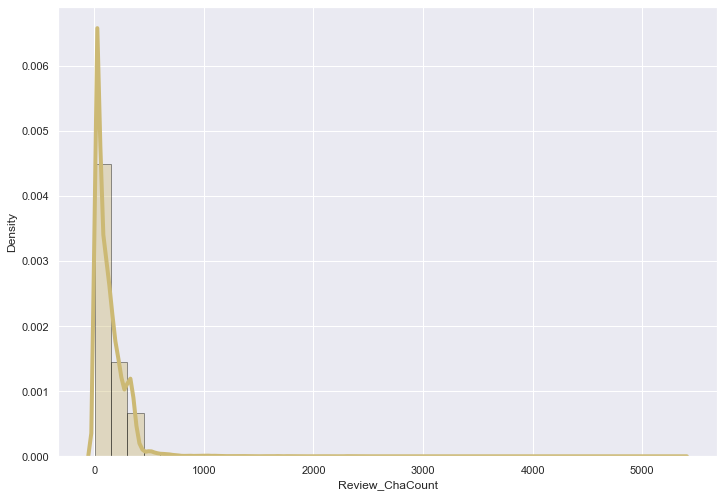

In [48]:
# density plot and histogram of all character count
sns.distplot(df['Review_ChaCount'], hist = True, kde = True,
            bins = int(180/5), color = 'y',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

Above plot represents histogram for character count of Review text, which is quite similar to the histogram of word count.

# Removing Outliers:

As we know that some of the review are too lengthy, so i have to treat them as outliers and remove them using z_score method.

In [49]:
#Checking the shape of the dataset
df.shape

(27241, 4)

In [50]:
# Applying zscore to remove outliers
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[['Review_WordCount']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.shape

(26963, 4)

Great by removing the outliers we are loosing very less data and it is in acceptable range.

# Plotting histograms for word count and character counts again after removing outliers:

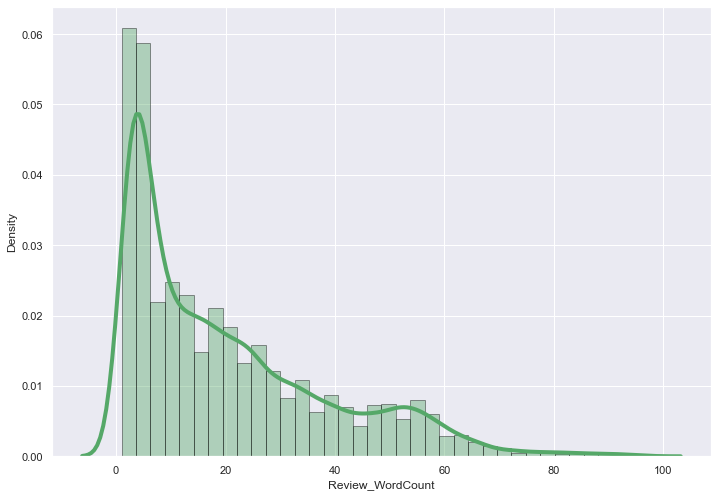

In [51]:
# density plot and histogram of Review word count
sns.distplot(df['Review_WordCount'], hist = True, kde = True,
            bins = int(180/5), color = 'g',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

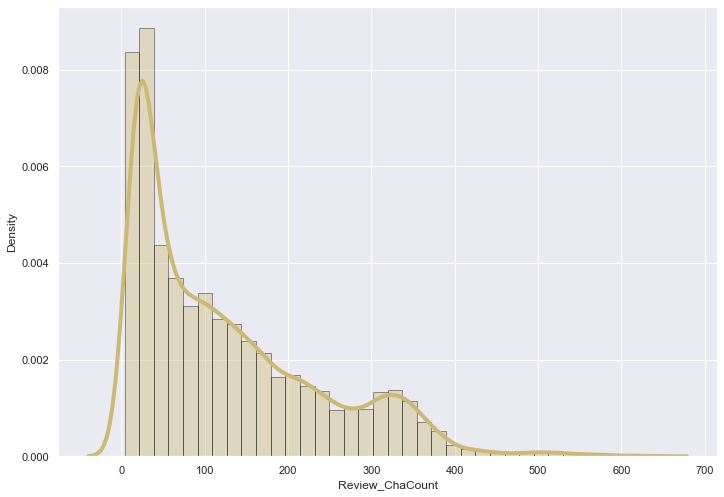

In [52]:
# density plot and histogram of all character count
sns.distplot(df['Review_ChaCount'], hist = True, kde = True,
            bins = int(180/5), color = 'y',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

After plotting histograms for word counts and character counts and after removing outliers we can see we are left out with good range of number of words and characters.

# iii) Top 30 most frequently occuring words:

In [53]:
#function to plot most frequent terms
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    #selecting top 30 most freq words
    d = words_df.nlargest(columns = 'count', n = terms)
    plt.figure(figsize = (20,10))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

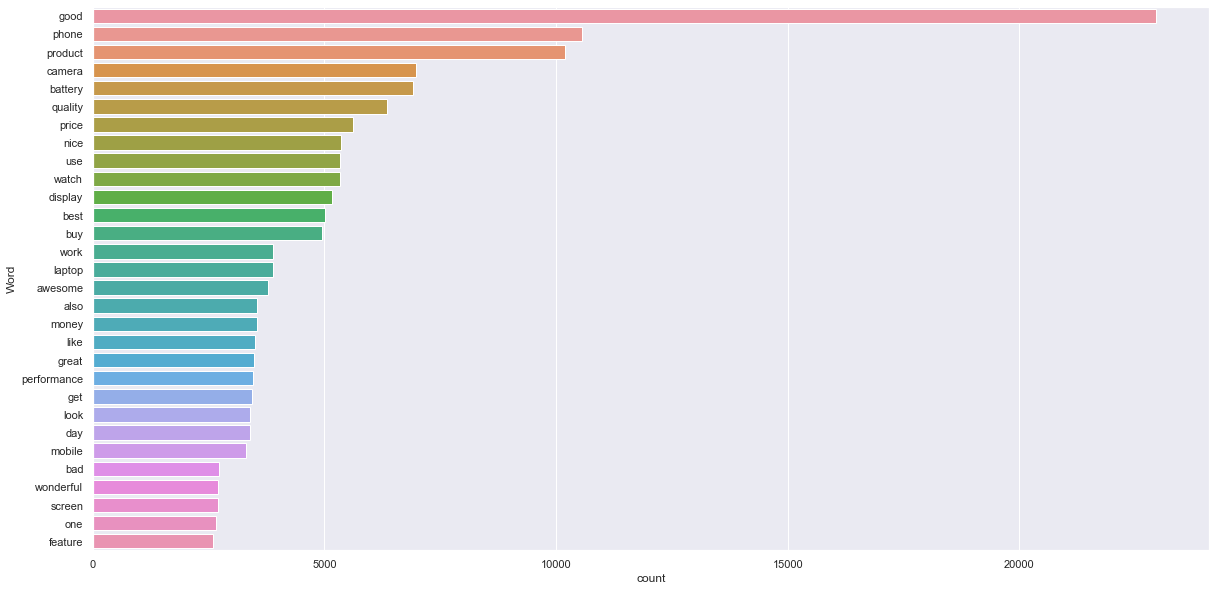

In [54]:
freq_words(df['Review'])

By seeing the above plot we can see that Good, prodout, quality......are occurring frequently.

# iv) Top 30 Rare words:

In [55]:
#function to plot least frequent terms
def rare_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    #selecting top 30 most freq words
    d = words_df.nsmallest(columns = 'count', n = terms)
    plt.figure(figsize = (20,10))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

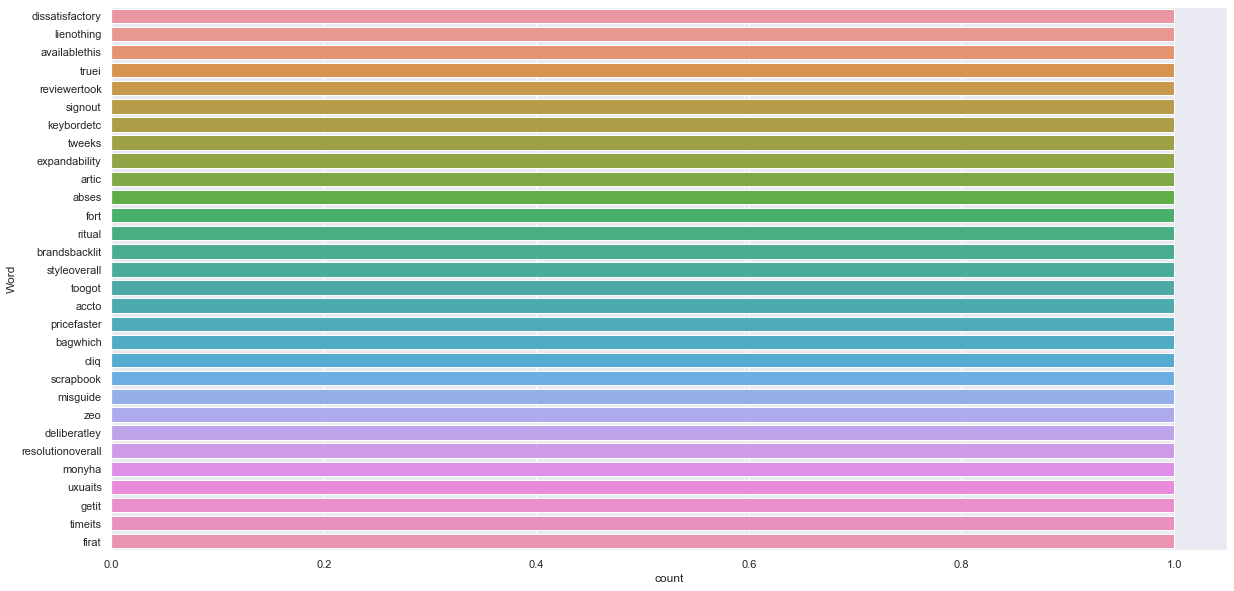

In [56]:
rare_words(df['Review'])

Above list of words are have rare occurance in Review.

# v) Word cloud:

In [58]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
                    background_color='white',
                    stopwords = stopwords,
                    max_words = 500,
                    max_font_size = 40,
                    scale = 3,
                    random_state = 1).generate(str(data))
    fig = plt.figure(1, figsize=(15,15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

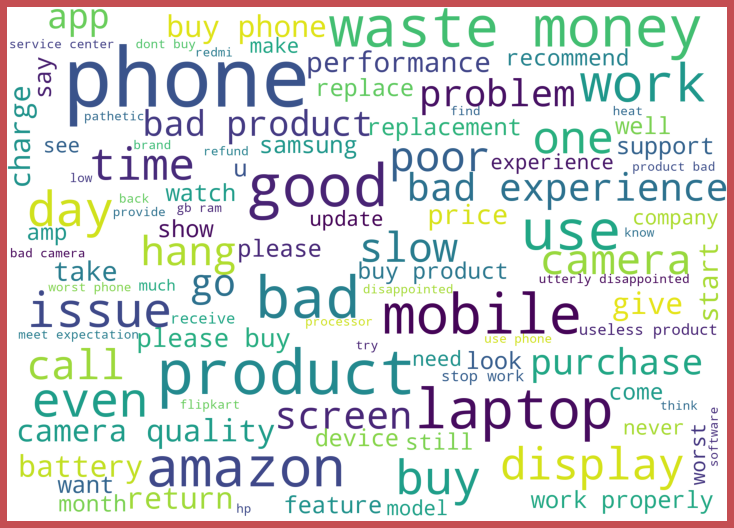

In [59]:
#Let's plot the loud words with Rating 1
from wordcloud import WordCloud

df1=df['Review'][df['Ratings']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

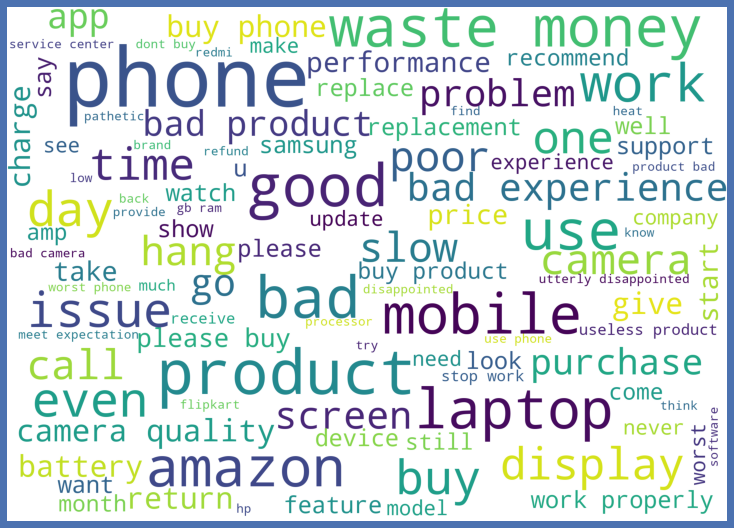

In [60]:
#Let's plot the loud words with Rating 2
from wordcloud import WordCloud

df2=df['Review'][df['Ratings']==2]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

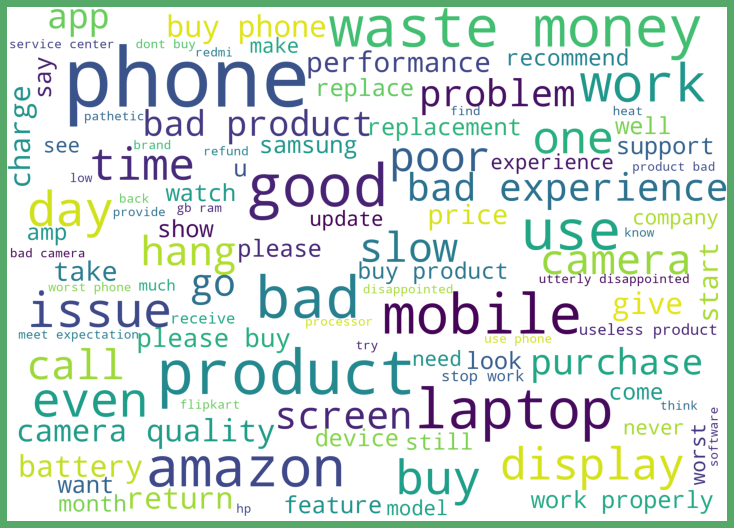

In [61]:
#Let's plot the loud words with Rating 3
from wordcloud import WordCloud

df3=df['Review'][df['Ratings']==3]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


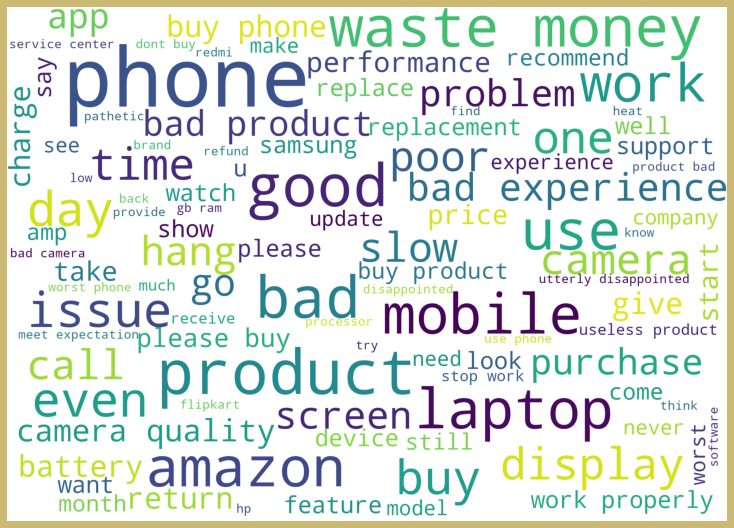

In [62]:
#Let's plot the loud words with Rating 4
from wordcloud import WordCloud

df4=df['Review'][df['Ratings']==4]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='y')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)


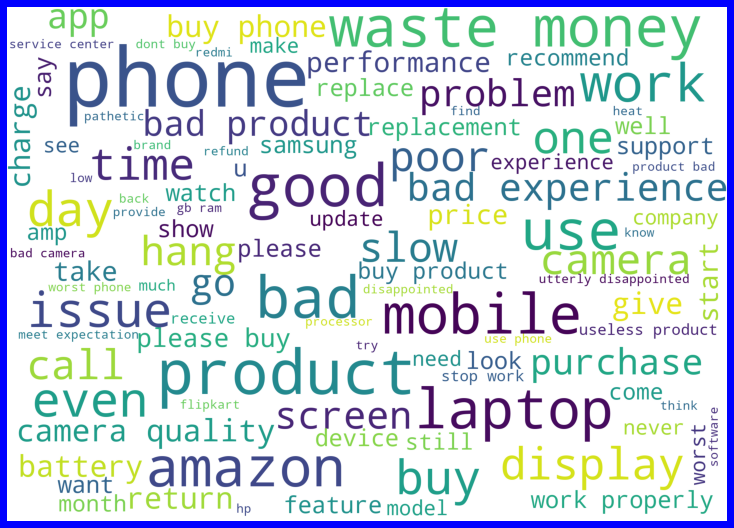

In [63]:
#Let's plot the loud words with Rating 5
from wordcloud import WordCloud

df5=df['Review'][df['Ratings']==5]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='blue')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)


Observations:

From the above plots we can clearly see the words which are indication of Reviewer's opinion on products. Here most frequent words used for each Rating is displayed in the word cloud.

In [64]:
#Checking the value counts of Ratings column
df.Ratings.value_counts()

5    14802
4     5380
1     2809
3     2284
2     1688
Name: Ratings, dtype: int64

# Model Building and Evaluation:

In [65]:
# Separating feature and label
x = df['Review']
y = df['Ratings']

# Converting text data into vectors using Tfidf Vectorizer:

In [66]:
#using the n_gram tfidf vectorizer(Word vectors)
from sklearn.feature_extraction.text import TfidfVectorizer
word_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'word',
                                token_pattern = r'\w{1,}',
                                stop_words = 'english',
                                ngram_range = (1,3),
                                max_features = 100000)
word_vectorizer.fit(x)
train_word_features = word_vectorizer.transform(x)

In [67]:
#Character vectorizer
char_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'char',
                                stop_words = 'english',
                                ngram_range = (2,6),
                                max_features = 50000)
char_vectorizer.fit(x)
train_char_features = char_vectorizer.transform(x)

In [68]:
#we will combine both word vectors and character vectors as input for our model
from scipy.sparse import hstack
train_features = hstack([train_char_features,train_word_features])

# Splitting the data into train and test:

In [69]:
# Splitting train and test data
seed = 1
x_train, x_test, y_train, y_test = train_test_split(train_features, y, test_size = 0.25, random_state = seed)

Data Balancing:

In [70]:
#lets check the shapes of traning and test data
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (20222, 150000)
x_test (6741, 150000)
y_train (20222,)
y_test (6741,)


Now let's do oversmapling in order to make data balanced.

In [71]:
#Checking the value counts of Ratings column
y.value_counts()

5    14802
4     5380
1     2809
3     2284
2     1688
Name: Ratings, dtype: int64

In [72]:
#Checking the number of classes before fit
from collections import Counter
print("The number of classes before fit{}".format(Counter(y_train)))

The number of classes before fitCounter({5: 11153, 4: 4026, 1: 2054, 3: 1717, 2: 1272})


So we have maximum count 6594 for 5ratings hence will over sample mannually all the ratings to the mark 6594.

In [73]:
# Oversample and plot imbalanced dataset with SMOTE
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# transforming the dataset
os=SMOTE(sampling_strategy = {1: 37633, 2: 37633, 3: 37633, 4: 37633, 5: 37633})
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)

print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fitCounter({5: 11153, 4: 4026, 1: 2054, 3: 1717, 2: 1272})
The number of classes after fit Counter({5: 37633, 4: 37633, 3: 37633, 2: 37633, 1: 37633})


So now we have successfully balanced the data. Let's proceed with model building.

In [75]:
# Importing libraries for ML Algorithms

from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB,BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV


In [76]:
# defining the algorithms
rf = RandomForestClassifier()
DTC = DecisionTreeClassifier()
svc = LinearSVC()
lr = LogisticRegression(solver='lbfgs')
mnb = MultinomialNB()
bnb = BernoulliNB()
sgd = SGDClassifier()

In [77]:
#creating a function to train and test the model with evaluation
def BuiltModel(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    model.fit(x_train_ns,y_train_ns)
    y_pred = model.predict(x_train_ns)
    pred = model.predict(x_test)

    accuracy = accuracy_score(y_test,pred)*100

    print(f"Accuracy Score:", accuracy)
    print("---------------------------------------------------")

    #confusion matrix & classification report
    
    print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")
    print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred)}\n")

In [78]:
# Running multiple algorithms
for model in [lr,svc,DTC,sgd,rf]:
    BuiltModel(model)

******************************LogisticRegression******************************
Accuracy Score: 88.34000890075656
---------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           1       0.83      0.87      0.85       755
           2       0.68      0.70      0.69       416
           3       0.72      0.74      0.73       567
           4       0.85      0.86      0.85      1354
           5       0.96      0.94      0.95      3649

    accuracy                           0.88      6741
   macro avg       0.81      0.82      0.81      6741
weighted avg       0.89      0.88      0.88      6741

Confusion Matrix : 
 [[ 656   53   26   11    9]
 [  60  293   42   13    8]
 [  49   55  419   28   16]
 [  10   19   53 1166  106]
 [  16   13   39  160 3421]]

******************************LinearSVC******************************
Accuracy Score: 88.68120456905504
---------------------------------------------------
C

# Cross validation score:

In [87]:
# Defning function cross_val to find cv score of models
def cross_val(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    scores = cross_val_score(model,train_features,y, cv = 3).mean()*100
    print("Cross validation score :", scores)

# HyperParameter Tuning:

In [80]:
# let's selects different parameters for tuning
grid_params = {
                'penalty':['l2','l1','elasticnet'],
                'loss':['hinge','squared_hinge'],
                'n_jobs':[-1,1]
                }

In [81]:
# Training the model with the given parameters using GridSearchCV
GCV =  GridSearchCV(sgd, grid_params, cv = 3, scoring='accuracy',n_jobs=-1,verbose=2)

In [88]:
# Printing the best parameters found by GridSearchCV
GCV.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

# Final Model:

In [83]:
# Training our final model with above best parameters
model = SGDClassifier(loss = 'squared_hinge', n_jobs = -1, penalty = 'l1')
model.fit(x_train_ns,y_train_ns) #fitting data to model
pred = model.predict(x_test)
accuracy = accuracy_score(y_test,pred)*100

# Printing accuracy score
print("Accuracy Score :", accuracy)

# Printing Confusion matrix
print(f"\nConfusion Matrix : \n {confusion_matrix(y_test,pred)}\n")

# Printing Classification report
print(f"\nCLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")

Accuracy Score : 85.9961430054888

Confusion Matrix : 
 [[ 620   58   42   15   20]
 [  51  284   38   22   21]
 [  41   51  392   45   38]
 [  14   27   54 1067  192]
 [  21   14   36  144 3434]]


CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           1       0.83      0.82      0.83       755
           2       0.65      0.68      0.67       416
           3       0.70      0.69      0.69       567
           4       0.83      0.79      0.81      1354
           5       0.93      0.94      0.93      3649

    accuracy                           0.86      6741
   macro avg       0.79      0.78      0.79      6741
weighted avg       0.86      0.86      0.86      6741



# Model Saving:

In [85]:
import joblib
joblib.dump(model,"Ratings_RP.pkl")

['Ratings_RP.pkl']